#Package

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import gdown
import random
import plotly.express as px
from scipy import stats
from scipy.stats import shapiro, anderson
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

#Data

In [2]:
#Import Data Set
!gdown 1FeROsUfXf0MKNo7wdwIzXbqVpcs7HYW9
data = pd.read_csv("loan_data_2007_2014.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1FeROsUfXf0MKNo7wdwIzXbqVpcs7HYW9
From (redirected): https://drive.google.com/uc?id=1FeROsUfXf0MKNo7wdwIzXbqVpcs7HYW9&confirm=t&uuid=3896646e-1dd0-4666-a69f-e0b7a432d8d7
To: /content/loan_data_2007_2014.csv
100% 240M/240M [00:06<00:00, 36.2MB/s]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Preprocessing

In [5]:
kolom = data.columns
print(kolom)

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [6]:
data = data.drop(['Unnamed: 0',
                  'id',
                  'member_id',
                  'emp_title',
                  'emp_length',
                  'annual_inc',
                  'desc',
                  'url',
                  'purpose',
                  'addr_state',
                  'zip_code',
                  'title',
                  'delinq_2yrs',
                  'earliest_cr_line',
                  'inq_last_6mths',
                  'mths_since_last_delinq',
                  'mths_since_last_record',
                  'open_acc',
                  'pub_rec',
                  'revol_util',
                  'total_acc',
                  'last_pymnt_d',
                  'next_pymnt_d',
                  'last_credit_pull_d',
                  'collections_12_mths_ex_med',
                  'mths_since_last_major_derog',
                  'annual_inc_joint',
                  'dti_joint',
                  'issue_d',
                  'verification_status_joint',
                  'acc_now_delinq',
                  'tot_coll_amt',
                  'tot_cur_bal',
                  'open_acc_6m',
                  'open_il_6m',
                  'open_il_12m',
                  'open_il_24m',
                  'mths_since_rcnt_il',
                  'total_bal_il',
                  'il_util',
                  'open_rv_12m',
                  'open_rv_24m',
                  'max_bal_bc',
                  'all_util',
                  'total_rev_hi_lim',
                  'inq_fi',
                  'total_cu_tl',
                  'inq_last_12m',
                  'policy_code',
                  'application_type']
                  , axis = 1)

In [12]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,0,10.65,162.87,1,6,5,2,...,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,1,15.27,59.83,2,13,5,1,...,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,0,15.96,84.33,2,14,5,0,...,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,0,13.49,339.31,2,10,5,1,...,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
4,3000,3000,3000.0,1,12.69,67.79,1,9,5,1,...,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,1,14.47,432.64,2,11,1,1,...,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,0.00,432.64
466281,22000,22000,22000.0,1,19.97,582.50,3,19,1,2,...,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,0.00,17.50
466282,20700,20700,20700.0,1,16.99,514.34,3,15,1,2,...,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,0.00,514.34
466283,2000,2000,2000.0,0,7.90,62.59,0,3,4,2,...,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,0.00,1500.68


#Klasifikasi

In [7]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import r2_score

In [8]:
for col in data.select_dtypes(include = ["object"]).columns:
  print(f"{col} : {data[col].unique()}")

term : [' 36 months' ' 60 months']
grade : ['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade : ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
home_ownership : ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
verification_status : ['Verified' 'Source Verified' 'Not Verified']
loan_status : ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
pymnt_plan : ['n' 'y']
initial_list_status : ['f' 'w']


In [9]:
for col in data.select_dtypes(include = ["object"]).columns:
  label_encoder = preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())
  data[col] = label_encoder.transform(data[col])
  print(f"{col} : {data[col].unique()}")

term : [0 1]
grade : [1 2 0 4 5 3 6]
sub_grade : [ 6 13 14 10  9  3 20 26 12  5 15  0  7  8 11 16  2  4 19  1 23 17 18 27
 22 28 25 24 33 21 32 31 30 29 34]
home_ownership : [5 4 1 3 2 0]
verification_status : [2 1 0]
loan_status : [5 0 1 2 8 6 7 4 3]
pymnt_plan : [0 1]
initial_list_status : [0 1]


<Axes: >

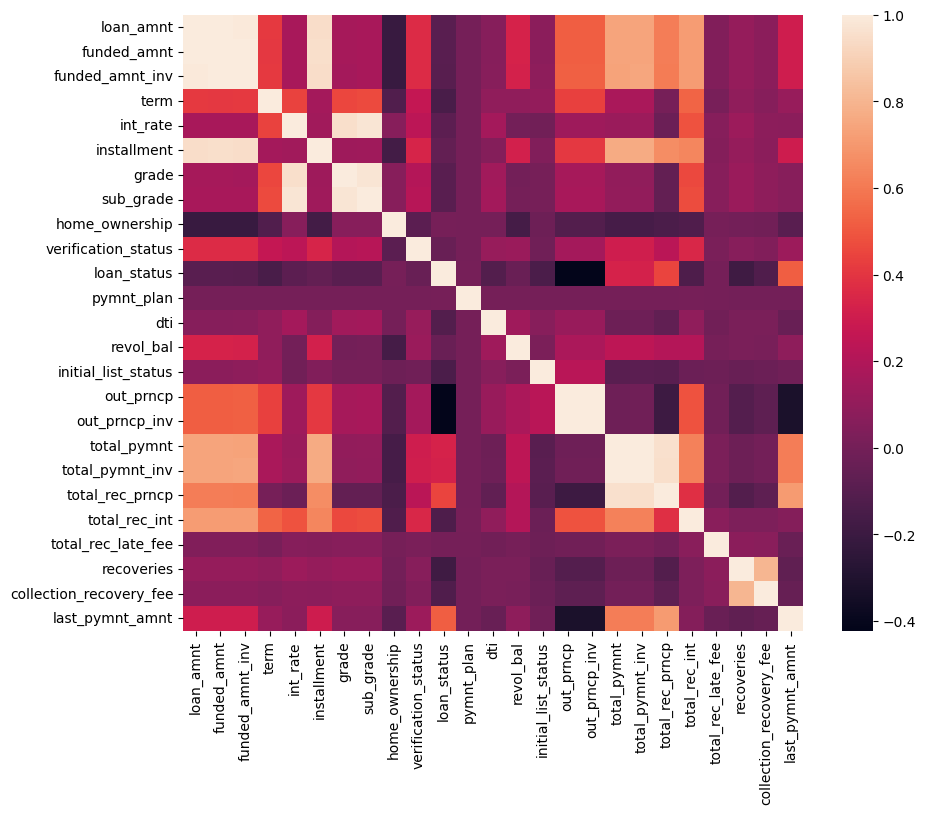

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), fmt=".2g", annot=False)

In [11]:
X = data[["loan_amnt", "term", "int_rate", "grade", "home_ownership", "verification_status", "pymnt_plan", "total_pymnt"]]
y = data["loan_status"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(373028, 8) (93257, 8)


##Regression logistic

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelLR = LogisticRegression()
scoreLR = cross_val_score(modelLR, x_train, y_train, cv=5)

print(scoreLR)
print(np.mean(scoreLR))

[0.84273383 0.84199662 0.83987883 0.84090879 0.84186047]
0.8414757064291113


In [13]:
modelLR.fit(x_train,y_train)
y_predLR_init = modelLR.predict(x_test)

In [14]:
print("Hasil pemodelan tanpa parameter terbaik")
print(confusion_matrix(y_test,y_predLR_init),"\n")
print(classification_report(y_test,y_predLR_init))

Hasil pemodelan tanpa parameter terbaik
[[ 1334  6818     0     0     0   317     0     0     0]
 [    0 40619     0     0     0  4275     0     0     0]
 [    2   167     0     0     0     4     0     0     0]
 [   35   100     0     0     0    13     0     0     0]
 [    0    10     0     0     0   367     0     0     0]
 [    2   259     0     0     0 36645     0     0     0]
 [    0   565     0     0     0    88     0     0     0]
 [    0   207     0     0     0    30     0     0     0]
 [    2  1280     0     0     0   118     0     0     0]] 

              precision    recall  f1-score   support

           0       0.97      0.16      0.27      8469
           1       0.81      0.90      0.86     44894
           2       0.00      0.00      0.00       173
           3       0.00      0.00      0.00       148
           4       0.00      0.00      0.00       377
           5       0.88      0.99      0.93     36906
           6       0.00      0.00      0.00       653
           

##KNN

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

print(knn.predict(x_test))
print(knn.score(x_test, y_test))

[5 1 5 ... 1 5 5]
0.8493088990638772


##Decision Tree

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Function to perform training with giniIndex.
def train_using_gini(x_train, x_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(x_train, y_train)
    return clf_gini

# Function to perform training with entropy.
def tarin_using_entropy(x_train, x_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(x_train, y_train)
    return clf_entropy


# Function to make predictions
def prediction(x_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))

    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)

    print("Report : ",
    classification_report(y_test, y_pred))

# Driver code
def main():

    # Building Phase
    clf_gini = train_using_gini(x_train, x_test, y_train)
    clf_entropy = tarin_using_entropy(x_train, x_test, y_train)

    # Operational Phase
    print("Results Using Gini Index:")

    # Prediction using gini
    y_pred_gini = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)

    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(x_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)


# Calling main function
if __name__=="__main__":
    main()

Results Using Gini Index:
Predicted values:
[5 1 5 ... 5 5 5]
Confusion Matrix:  [[  981  6604     0     0     0   884     0     0     0]
 [  168 35124     0     0     0  9602     0     0     0]
 [    5   149     0     0     0    19     0     0     0]
 [   17   115     0     0     0    16     0     0     0]
 [    0   121     0     0     0   256     0     0     0]
 [    3  5368     0     0     0 31535     0     0     0]
 [    2   490     0     0     0   161     0     0     0]
 [    1   178     0     0     0    58     0     0     0]
 [   21  1128     0     0     0   251     0     0     0]]
Accuracy :  72.53074836205326
Report :                precision    recall  f1-score   support

           0       0.82      0.12      0.20      8469
           1       0.71      0.78      0.75     44894
           2       0.00      0.00      0.00       173
           3       0.00      0.00      0.00       148
           4       0.00      0.00      0.00       377
           5       0.74      0.85      0

##Naive Bayes

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(x_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.6076219479502879


##Random Forest

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create regressor object
regressor = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=15,
                                       n_estimators=100, verbose=1, oob_score=True)

# fit the regressor with x and y data
regressor.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomForestRegressor(max_depth=15, n_jobs=-1, oob_score=True, random_state=42,
                      verbose=1)

In [19]:
regressor.oob_score_

0.6600361801528052

In [20]:
scoreRF = cross_val_score(regressor, x_train, y_train, cv=10)
print(scoreRF)
print("akurasi rata-rata : ",np.mean(scoreRF))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.4s
[Parall

[0.65569695 0.653564   0.65416762 0.66035017 0.65950474 0.66318296
 0.65261418 0.65874645 0.66789519 0.65415992]
akurasi rata-rata :  0.6579882181029746


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


In [21]:
regressor.fit(x_train, y_train)
y_predRF_init = regressor.predict(x_test)
print(confusion_matrix(y_test,np.round(abs(y_predRF_init))),"\n")
print(classification_report(y_test,np.round(abs(y_predRF_init))))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


[[ 1975  5853   304    74   145   118     0     0     0]
 [    3 39566  1363  1016  1986   959     1     0     0]
 [   12   149     6     3     2     1     0     0     0]
 [   24    82    26     3     5     8     0     0     0]
 [    0     6     4     4    87   276     0     0     0]
 [    0   163   170   934  7095 28543     1     0     0]
 [    0   534    32    24    48    15     0     0     0]
 [    0   199    10    11    11     6     0     0     0]
 [    8  1198    71    37    52    34     0     0     0]] 

              precision    recall  f1-score   support

           0       0.98      0.23      0.38      8469
           1       0.83      0.88      0.85     44894
           2       0.00      0.03      0.01       173
           3       0.00      0.02      0.00       148
           4       0.01      0.23      0.02       377
           5       0.95      0.77      0.85     36906
           6       0.00      0.00      0.00       653
           7       0.00      0.00      0.00       2

##XGboost

In [13]:
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import xgboost as xgb

#adding additional parameters to reduce the chance of overfitting.
xgb_model = xgb.XGBClassifier(booster='gbtree',max_depth = 5,
learning_rate=0.1,min_child_weight = 6, subsample = 0.5,n_estimators = 200,cv=5,
                              gamma=0, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

array([[ 3867,  4237,     0,    18,     8,   339,     0,     0,     0],
       [   49, 40645,     0,     0,     1,  4199,     0,     0,     0],
       [   30,   139,     0,     0,     0,     4,     0,     0,     0],
       [   60,    31,     0,    39,     6,    12,     0,     0,     0],
       [    2,     6,     0,     5,    88,   276,     0,     0,     0],
       [   11,   400,     0,     0,    33, 36462,     0,     0,     0],
       [    1,   567,     0,     0,     0,    85,     0,     0,     0],
       [    1,   208,     0,     0,     0,    28,     0,     0,     0],
       [  101,  1187,     0,     0,     0,   112,     0,     0,     0]])

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.87


##LightGBM

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

y_pred=clf.predict(x_test)

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 373028, number of used features: 7
[LightGBM] [Info] Start training from score -2.395117
[LightGBM] [Info] Start training from score -0.732415
[LightGBM] [Info] Start training from score -6.338685
[LightGBM] [Info] Start training from score -6.411044
[LightGBM] [Info] Start training from score -5.444798
[LightGBM] [Info] Start training from score -0.925570
[LightGBM] [Info] Start training from score -5.008167
[LightGBM] [Info] Start training from score -5.940836
[LightGBM] [Info] Start training from score -4.216905
LightGBM Model accuracy score: 0.8725


In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1-Score: 0.87


##Hasil Klasifikasi

In [18]:
from tabulate import tabulate
data1 = [["Regresi Logistik", 84],
        ["KNN", 85],
        ["Decision Tree (Gini)",73 ],
        ["Decision Tree (Entropy)", 72],
        ["Naive Bayes",61 ],
        ["Random Forest", 66],
        ["XGBoost", 87],
        ["LightGBM", 87]]

#define header names
col_names = ['Model', 'Akurasi (%)']

#display table
print(tabulate(data1, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════════╤═══════════════╕
│ Model                   │   Akurasi (%) │
╞═════════════════════════╪═══════════════╡
│ Regresi Logistik        │            84 │
├─────────────────────────┼───────────────┤
│ KNN                     │            85 │
├─────────────────────────┼───────────────┤
│ Decision Tree (Gini)    │            73 │
├─────────────────────────┼───────────────┤
│ Decision Tree (Entropy) │            72 │
├─────────────────────────┼───────────────┤
│ Naive Bayes             │            61 │
├─────────────────────────┼───────────────┤
│ Random Forest           │            66 │
├─────────────────────────┼───────────────┤
│ XGBoost                 │            87 │
├─────────────────────────┼───────────────┤
│ LightGBM                │            87 │
╘═════════════════════════╧═══════════════╛
